1. Library Import

In [2]:
import json
import random

import cv2
import matplotlib.pyplot as plt

Define function  
-. get_file_path : 각 Image 파일 경로 출력  
-. get_annotations : Ground Truth 정보 출력  
-. get_categories : 분류하고자 하는 Class 정보 출력  
-. read_image : Image 출력  
-. plot_bbox : 화면에 그리기 (Image, Bounding Box, Class)  

In [3]:
from collections import namedtuple, OrderedDict
Color = namedtuple('RGB','red, green, blue')
colors = {} #dict of colors
class RGB(Color):
	def hex_format(self):
		return '#{:02X}{:02X}{:02X}'.format(self.red,self.green,self.blue)

RED = RGB(255, 0, 0)
ORANGE = RGB(255, 128, 0)
YELLOW = RGB(255, 255, 0)
GREEN = RGB(0, 128, 0)
BLUE = RGB(0, 0, 255)
BROWN = RGB(165, 42, 42)
PURPLE = RGB(147, 112, 219)
NAVAJOWHITE = RGB(255, 222, 173)
WHEAT = RGB(245, 222, 179)
BLACK = RGB(0, 0, 0)

In [46]:
def get_file_path(json_file, image_num):
    file_path = json_file['images'][image_num]['file_name']
    return file_path

def get_annotations(json_file, image_num):
    anns = [ann for ann in json_file['annotations'] if ann['image_id'] == image_num]
    return anns

def get_categories(json_file):
    categories = dict()
    class_num = len(json_file['categories'])
    for index in range(class_num):
        categories[index] = json_file['categories'][index]['name']
    return categories

def read_image(dataset_path, file_path):
    image = cv2.imread(dataset_path + file_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def select_color(ann):
    # 'General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing'
    categories = ann['category_id']
    categories_color = {0:RED, 1:ORANGE, 2:YELLOW, 3:GREEN, 4:BLUE, 5:BROWN, 6:PURPLE, 7:NAVAJOWHITE, 8:WHEAT, 9:BLACK}
    return categories_color[categories]

def plot_bbox(image, anns):
    for ann in anns:
        xmin, ymin, w, h = map(int, ann['bbox'])
        class_color = select_color(ann)
        image = cv2.rectangle(image, (xmin, ymin), (xmin + w, ymin + h), class_color, 2)
        image = cv2.putText(image, categories[ann['category_id']], (xmin+2, ymin + h-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, class_color, 2, cv2.LINE_AA)
    plt.rcParams["figure.figsize"] = (8, 8)
    #image = cv2.resize(image, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
    #print(image.shape)
    plt.imshow(image)

3. Read json file

In [10]:
with open('/opt/ml/detection/dataset/train.json', 'r') as f:
    train_json = json.load(f)

dataset_path = '/opt/ml/detection/dataset/'

4. Initial image index

In [11]:
ImageIndex = 0

5. 함수 호출 및 Image 출력 (.ipynb 기준, 하기 코드만 돌리면 순차적으로 Image 출력)

Class = ['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']
ImageNo = 14, ImageName = train/0014.jpg


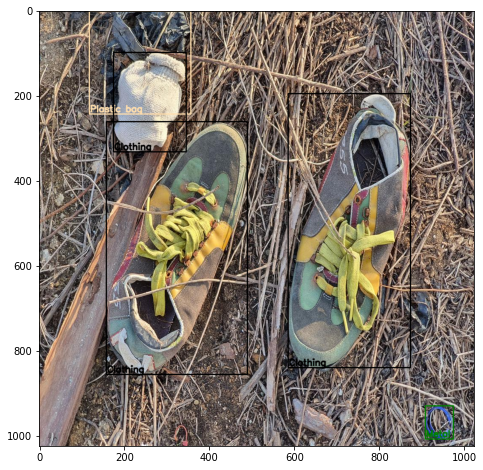

In [47]:
image_num = ImageIndex
file_path = get_file_path(train_json, image_num)
categories = get_categories(train_json)
anns = get_annotations(train_json, image_num)
image = read_image(dataset_path, file_path)
print(f"Class = {list(categories.values())}")
print(f"ImageNo = {ImageIndex}, ImageName = {file_path}")
plot_bbox(image, anns)
ImageIndex += 1

Dataset에 문제는 따로 없을까?

class 별로 color 추가 / data를 표 형태로 나열 (?) 해도 눈으로 안보인다.. / 

COCO는 하나의 API

Why do we sum all of losses?

In [5]:
import torch
import torch.nn as nn

external_grad =torch.tensor([1., 1., 1.])

In [9]:
y_hat = torch.tensor([1.,2.,3.], requires_grad=True)
y = torch.tensor([3.,3.,3.], requires_grad=True)


loss_1 = y**2 - y_hat**2
# loss_2 = target - output

#loss_1.backward(gradient=external_grad)
# loss_2.backward(gradient=external_grad)
#loss_2.backward()

print('output: ', y_hat.grad)
print('target: ', y.grad)

output:  None
target:  None


In [7]:
output_2 = torch.tensor([3.,4.,5.], requires_grad=True)
target_2 = torch.tensor([3.,3.,3.], requires_grad=True)
